✅ Data loaded.
📄 First few rows:
      0            1         2  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  

🧾 Renamed columns: Index(['id', 'entity', 'sentiment', 'text'], dtype='object')


/tmp/ipython-input-27-1309642712.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


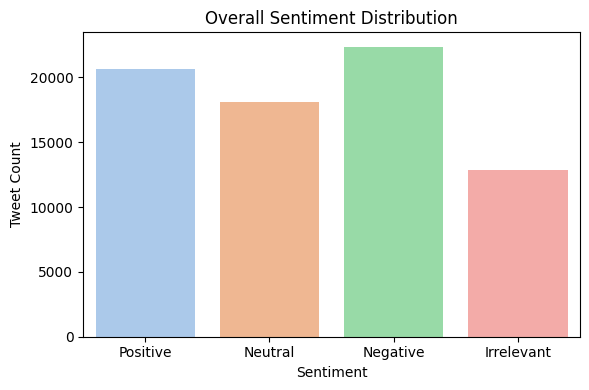

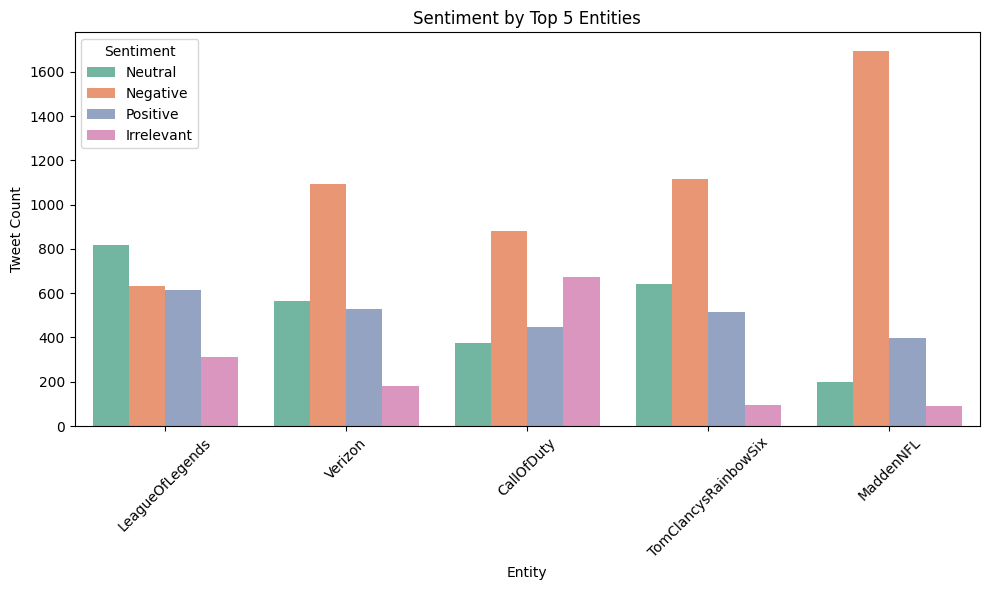

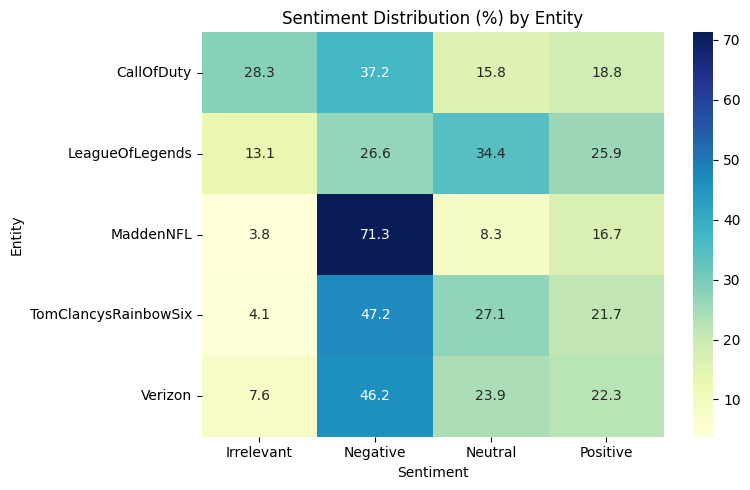

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

zip_path = '/content/twitter_training.csv.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')
csv_file = '/content/twitter_training.csv'

df = pd.read_csv(csv_file, header=None)
print("✅ Data loaded.")

print("📄 First few rows:")
print(df.head())

df.columns = ['id', 'entity', 'sentiment', 'text']
print("\n🧾 Renamed columns:", df.columns)

df = df.dropna(subset=['entity', 'sentiment', 'text'])

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.tight_layout()
plt.show()

top_entities = df['entity'].value_counts().nlargest(5).index
df_top = df[df['entity'].isin(top_entities)]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_top, x='entity', hue='sentiment', palette='Set2')
plt.title('Sentiment by Top 5 Entities')
plt.xlabel('Entity')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

heat_df = pd.crosstab(df_top['entity'], df_top['sentiment'], normalize='index') * 100
plt.figure(figsize=(8, 5))
sns.heatmap(heat_df, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Sentiment Distribution (%) by Entity')
plt.ylabel('Entity')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()
